In [145]:
import matplotlib.pyplot as plt
import numpy as np

In [146]:
class Brownian:
    def __init__(self, n, c):
        self.n = n # number of particles
        self.c = c # initial proportion of particles

        self.N = N = 10 # number of time steps

        # Place particles at even intervals along the axis and
        # fill the rest with NaNs to avoid plotting values that
        # haven't been calculated
        self.x = np.ma.zeros((N, n))
        self.x[0] = np.random.choice(np.arange(-n, n), size=n, replace=False)
        self.x[1:, :] = np.nan

        # Randomly assign a number of particle and anti-particle
        # states, according to the initial concentration
        n_p = int(n*(1 - c))
        n_a = n - n_p
        self.particles = np.concatenate((-1*np.ones(n_p), np.ones(n_a)))
        np.random.shuffle(self.particles)

        self.compute()

    def compute(self):
        N, n = self.N, self.n
        x, particles = self.x, self.particles

        self.annihilated = annihilated = np.zeros((N, n))

        for t in range(N-1):
            for (i, xi) in enumerate(x[t]):
                if annihilated[t, i] == 1: continue
                for (j, xj) in enumerate(x[t]):
                    if annihilated[t, j] == 1: continue
                    if particles[i] == -particles[j] and xi == xj:
                        annihilated[t+1:, i] = 1

            x[t + 1] = x[t] + np.random.choice([-0.5, 0.5], size=n)
        
    def plot(self):
        N, n = self.N, self.n

        kwargs = {'color': 'k', 'ls':'--', 'lw':0.5}
        for i in np.arange(-3*n, 3*n):
            plt.axline((0, i), slope=0.5, **kwargs)
            plt.axline((2*i, 0), slope=-0.5, **kwargs)

        x = np.ma.array(self.x, mask=self.annihilated)

        # Plot the trajectories of all particles
        for i, p in enumerate(self.particles):
            plt.plot(range(N), x[:, i], color = 'b' if p == 1 else 'r')

        plt.ylim([-n, n])
        plt.xlim([0, N-1])

        plt.show()

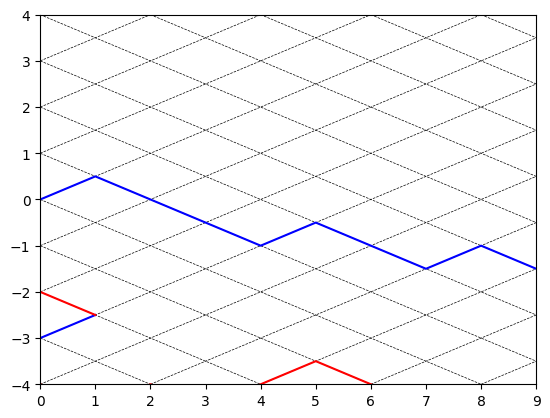

In [151]:
b = Brownian(4, 0.5)
b.plot()